<a href="https://colab.research.google.com/github/SamihaAzeem/ML1-Bootcamp/blob/main/cnn_tshirt_color_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Prepare the training set with a validation split
dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset_tshirt',  # Assuming you have a directory named 'dataset' with subdirectories for each color class
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset_tshirt',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False
)


Found 2133 files belonging to 4 classes.
Using 1707 files for training.
Found 2133 files belonging to 4 classes.
Using 426 files for validation.


In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))  # To avoid overfitting
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 127, 127, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 64)      36928     
                                                      

In [12]:
training_history = cnn.fit(x=dataset, validation_data=validation_set, epochs=50)

Epoch 1/50
54/54 [==============================] - 17s 296ms/step - loss: 0.0120 - accuracy: 0.9977 - val_loss: 1.5966 - val_accuracy: 0.8545
Epoch 2/50
54/54 [==============================] - 16s 277ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 1.4816 - val_accuracy: 0.8803
Epoch 3/50
54/54 [==============================] - 17s 281ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 1.5798 - val_accuracy: 0.8709
Epoch 4/50
54/54 [==============================] - 15s 266ms/step - loss: 0.0127 - accuracy: 0.9947 - val_loss: 2.2841 - val_accuracy: 0.8380
Epoch 5/50
54/54 [==============================] - 15s 264ms/step - loss: 0.0234 - accuracy: 0.9971 - val_loss: 1.7745 - val_accuracy: 0.8122
Epoch 6/50
54/54 [==============================] - 16s 274ms/step - loss: 0.0344 - accuracy: 0.9930 - val_loss: 1.2378 - val_accuracy: 0.8662
Epoch 7/50
54/54 [==============================] - 15s 262ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 1.0806 - val_accuracy: 0.8380

In [17]:
model_save_path = '/content/drive/My Drive/tshirt_CNNtrained_model_epoch50.h5'
cnn.save(model_save_path)

In [13]:
# Evaluate the model
train_loss, train_acc = cnn.evaluate(dataset)
print('Training accuracy:', train_acc)
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


54/54 [==============================] - 10s 159ms/step - loss: 0.0344 - accuracy: 0.9854
Training accuracy: 0.9853544235229492
14/14 [==============================] - 2s 77ms/step - loss: 2.6043 - accuracy: 0.8451
Validation accuracy: 0.8450704216957092


In [14]:
# Save the training history
import json
with open('/content/drive/My Drive/tshirt_CNNtraining_hist50.json', 'w') as f:
    json.dump(training_history.history, f)


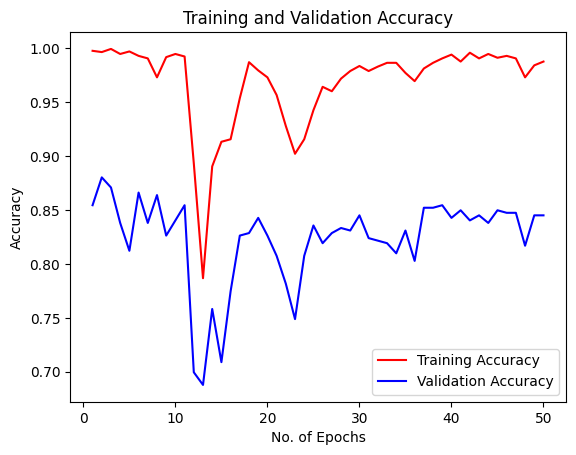

In [15]:
epochs = [i for i in range(1, 51)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Found 2133 files belonging to 4 classes.
1/1 [==============================] - 0s 127ms/step
Predicted: white


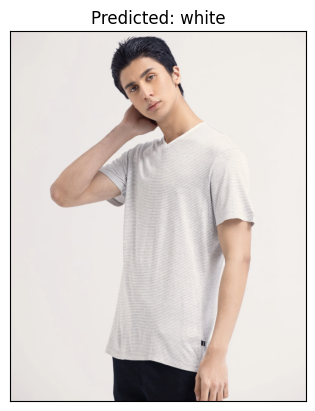

1/1 [==============================] - 0s 25ms/step
Predicted: white


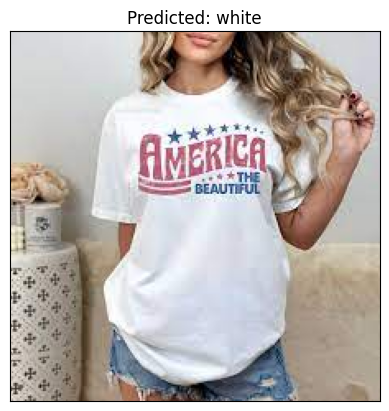

1/1 [==============================] - 0s 26ms/step
Predicted: white


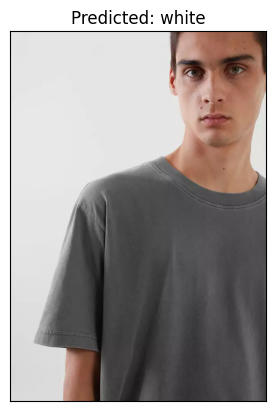

1/1 [==============================] - 0s 25ms/step
Predicted: blue


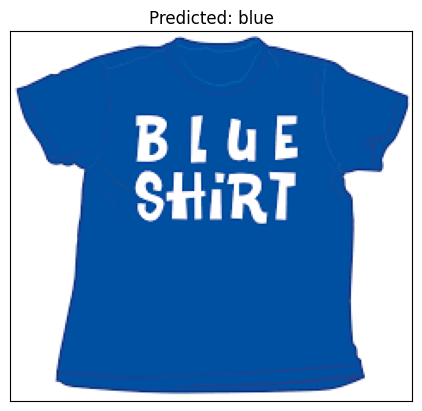

1/1 [==============================] - 0s 32ms/step
Predicted: black


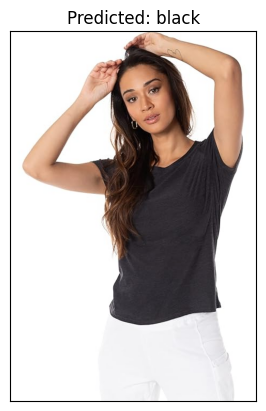

1/1 [==============================] - 0s 26ms/step
Predicted: black


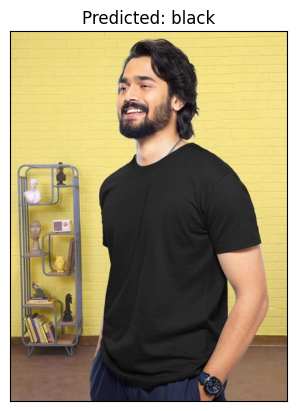

1/1 [==============================] - 0s 26ms/step
Predicted: blue


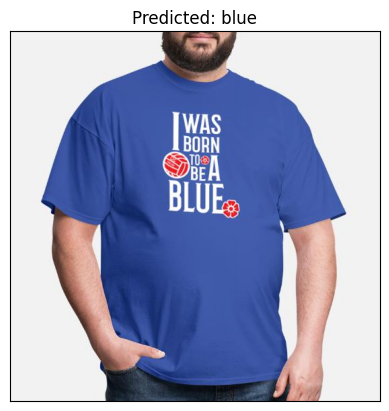

1/1 [==============================] - 0s 28ms/step
Predicted: white


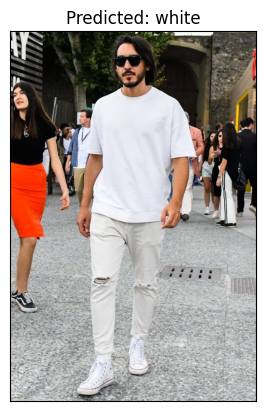

In [21]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the trained model
cnn = tf.keras.models.load_model('/content/drive/My Drive/tshirt_CNNtrained_model_epoch50.h5')

# Define the path to the folder containing images for prediction
image_folder_path = '/content/drive/MyDrive/predict_tshirt_color'

# Load the class names from the training set to ensure correct labels
train_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset_tshirt',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_names = train_set.class_names

# Iterate through each image in the folder
for subdir, dirs, files in os.walk(image_folder_path):
    for file in files:
        image_path = os.path.join(subdir, file)
        # Load and preprocess the image
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])  # Convert single image to a batch.

        # Make prediction
        predictions = cnn.predict(input_arr)
        result_index = np.argmax(predictions)  # Return index of max element

        # Extract the actual label from the folder structure
        actual_label = os.path.basename(subdir)

        # Print the prediction result
        print(f"Predicted: {class_names[result_index]}")

        # Visualize the image and the prediction
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[result_index]}")
        plt.xticks([])
        plt.yticks([])
        plt.show()


Real time tshirt color
